# Creating Bell States on qiskit

## Objectives
This notebook has as main goal the creation of the four Bell State vectors using qiskit.

## Introduction
The Bell States are four quantum state vectors of two qubits that represente the simplest way of entanglement between two qubits. These states also can be refereed as _Bell Basis_, since it is possible to represent any state of two qubits as linear combination of them.

The Bell States have importance in many quantum algorithms and protocols, such as Quantum Teleportation, Superdense Coding and in Quantum Cryptography.

## Bell States: definitions
The four Bell states can be defined as follows:

$\ket{ \phi ^+ } = \frac{\ket{ 00 } + \ket{ 11 }} {\sqrt 2}$

$\ket{ \phi ^- } = \frac{\ket{ 00 } - \ket{ 11 }} {\sqrt 2}$

$\ket{ \psi ^+ } = \frac{\ket{ 01 } + \ket{ 10 }} {\sqrt 2}$

$\ket{ \psi ^- } = \frac{\ket{ 01 } - \ket{ 10 }} {\sqrt 2}$

## Bell States: Creation
### Setup

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Creating $\ket{\phi ^+}$

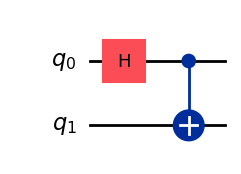

In [2]:
# Create a quantum circuit with 2 qubits
phip = QuantumCircuit(2)

# Applies a Hadamard Gate on the first qubit and a Controlled Not with target on the second one (control, target)
phip.h(0)
phip.cx(0, 1)

phip.draw("mpl")

### Creating $\ket{\phi ^-}$

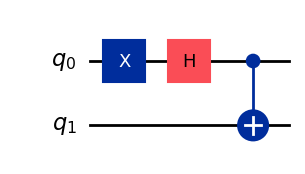

In [3]:
phim =QuantumCircuit(2)

phim.x(0)
phim.h(0)
phim.cx(0, 1)

phim.draw("mpl")

### Creating $\ket{\psi ^+}$

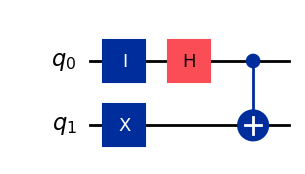

In [4]:
psip = QuantumCircuit(2)

psip.x(1)
psip.id(0)
psip.h(0)
psip.cx(0, 1)

psip.draw('mpl')

### Creating $\ket{\psi ^-}$

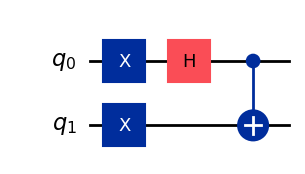

In [5]:
psim = QuantumCircuit(2)

psim.x(0)
psim.h(0)
psim.x(1)
psim.cx(0, 1)

psim.draw('mpl')

## Simulation and Visualization

In [6]:
# Bell state to be simulated and visualized 
backend = AerSimulator();
counts = []
for selected_bell_state in (phip, phim, psip, psim):
    selected_bell_state.measure_all();

    result = backend.run(selected_bell_state, backend=backend, shots=256).result();
    count = result.get_counts()
    counts.append(count)


### Probability distribution $\ket{\phi⁺}$

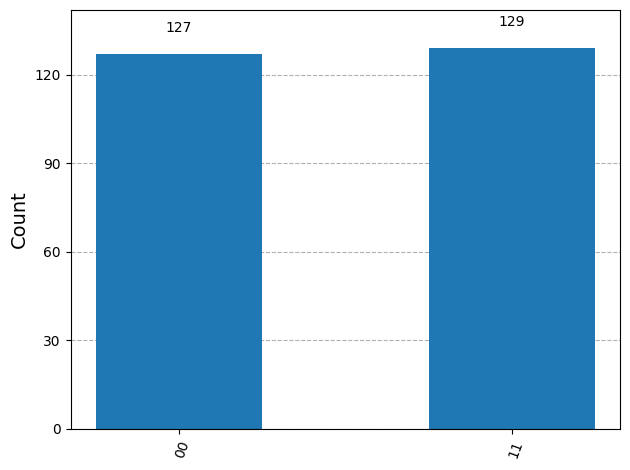

In [7]:
plot_histogram(counts[0])

### Probability distribution $\ket{\phi⁻}$

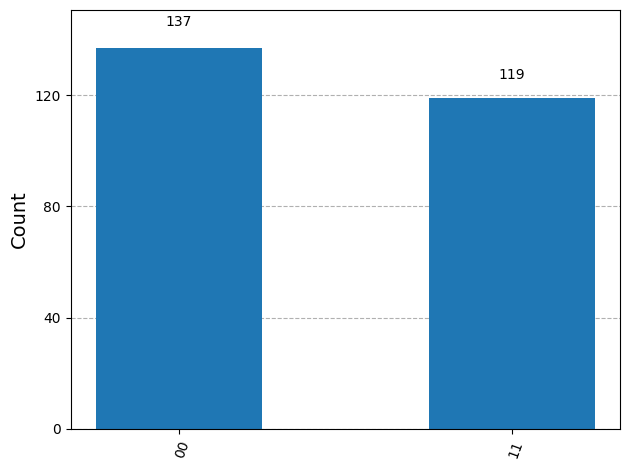

In [8]:
plot_histogram(counts[1])

### Probability distribution $\ket{\psi⁺}$

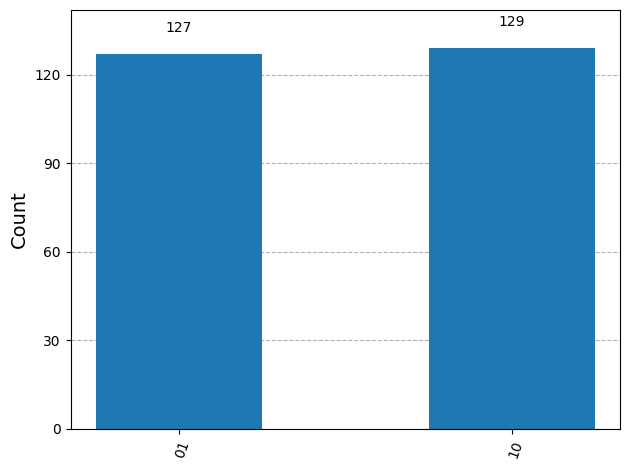

In [9]:
plot_histogram(counts[2])

### Probability distribution $\ket{\psi^-}$

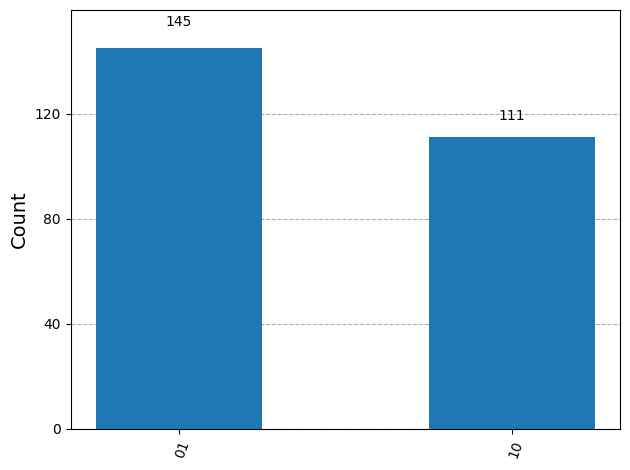

In [10]:
plot_histogram(counts[3])

### Follow-up question:

If the probability distributions of $\ket{\phi⁺}$ and $\ket{\phi⁻}$ (and $\ket{\psi⁺}$ and $\ket{\psi⁻}$ too), what is the difference between these states?